In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
from itertools import product

pd.set_option('display.max_columns', None)

In [1]:
# 1. 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (49.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [12]:
# 2. matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [5]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### 8. 광진구

In [17]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

광진_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/광진구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =광진_df['동']
광진_df = 광진_df.iloc[:,2:]
광진_df = 광진_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
광진_df

,인구 수,생활보호대상자 비율
0,0.574876,0.282145
1,0.421412,0.523713
2,0.180418,0.769007
3,0.437526,0.533419
4,0.210453,1.000000
5,0.755167,0.702302
6,0.000000,0.339497
7,0.455032,0.561281
8,0.655151,0.543070
9,0.745592,0.191942


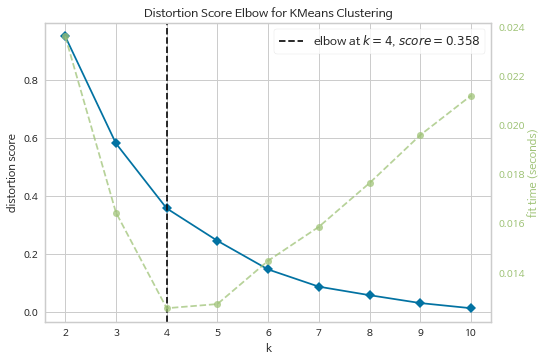

In [18]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(광진_df)
Elbow_M.show()

plt.show()

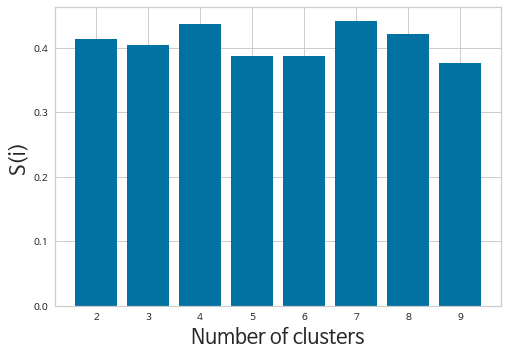

In [19]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(광진_df)
    silhouette_scores.append(silhouette_score(광진_df, m1.fit_predict(광진_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [20]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  7


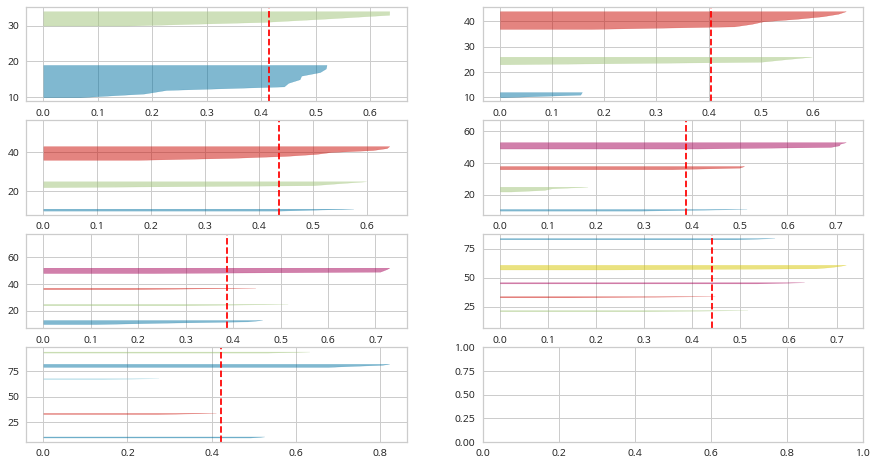

In [21]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7, 8]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(광진_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


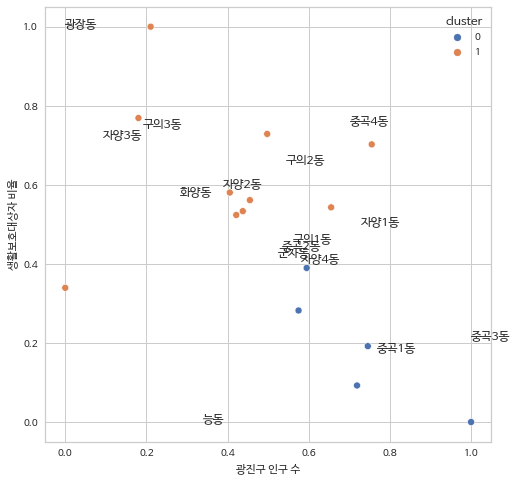

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


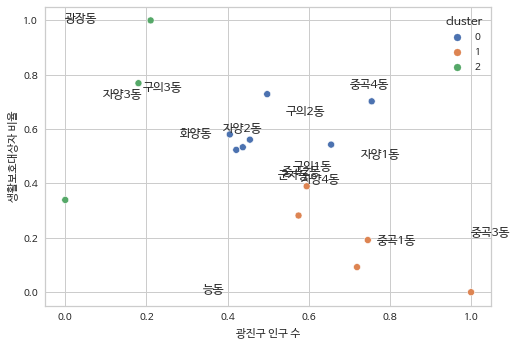

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


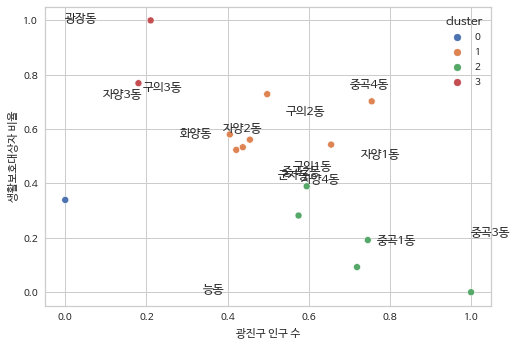

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


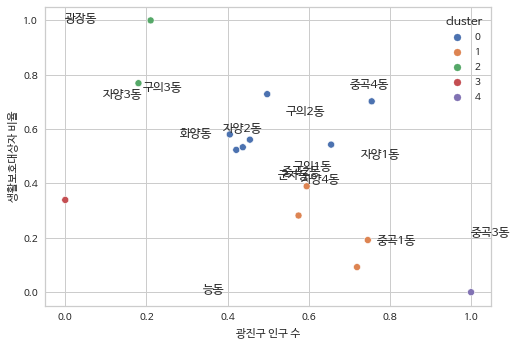

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


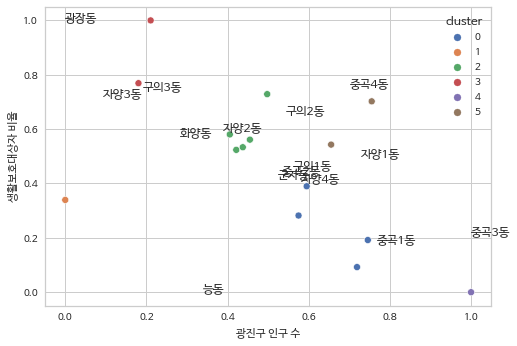

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


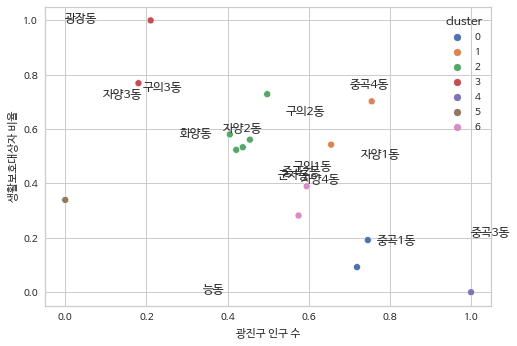

In [22]:
plt.figure(figsize = (8, 8))

for i in range(2,8):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(광진_df)
  광진_df['cluster'] = model.fit_predict(광진_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 광진_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 광진_df['생활보호대상자 비율']
  cluster_df['cluster'] = 광진_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('광진구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4로 결정

In [23]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(광진_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
광진_df['cluster'] = model.fit_predict(광진_df)

In [24]:
광진_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    7
0    4
1    3
3    1
Name: cluster, dtype: int64

In [25]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.718721  , 0.38244454, 0.5       ],
       [0.38992941, 0.33713591, 5.66666667],
       [0.37256993, 0.67095614, 2.28571429],
       [1.        , 0.        , 4.        ]])

In [26]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 광진_df['인구 수']
cluster_df['생활보호대상자 비율'] = 광진_df['생활보호대상자 비율']
cluster_df['cluster'] = 광진_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,화양동,0.574876,0.282145,1
1,군자동,0.421412,0.523713,2
2,중곡1동,0.180418,0.769007,2
3,중곡2동,0.437526,0.533419,2
4,중곡3동,0.210453,1.000000,2
5,중곡4동,0.755167,0.702302,0
6,능동,0.000000,0.339497,1
7,구의1동,0.455032,0.561281,2
8,구의2동,0.655151,0.543070,0
9,구의3동,0.745592,0.191942,0


In [27]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,화양동,0.574876,0.282145,1
1,군자동,0.421412,0.523713,2
2,중곡1동,0.180418,0.769007,2
3,중곡2동,0.437526,0.533419,2
4,중곡3동,0.210453,1.000000,2
5,중곡4동,0.755167,0.702302,0
6,능동,0.000000,0.339497,1
7,구의1동,0.455032,0.561281,2
8,구의2동,0.655151,0.543070,0
9,구의3동,0.745592,0.191942,0


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/광진_cluster.csv')

#### 8-1. 군집화

In [28]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['중곡4동', '구의2동', '구의3동', '자양3동']
cluster 1 :  ['화양동', '능동', '자양2동']
cluster 2 :  ['군자동', '중곡1동', '중곡2동', '중곡3동', '구의1동', '자양1동', '자양4동']
cluster 3 :  ['광장동']


#### 8-2. 클러스터별 인구수, 체육시설 수

In [29]:
# 클러스터별로 인구 수 합치기

광진_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/광진구_인구수, 수급인구비율.csv', index_col=0)
광진_peo_df = 광진_peo_df[['동', '인구 수']]
광진_peo_df = 광진_peo_df.rename(columns={'동':'dong'})
광진_peo_df


df_all = pd.merge(cluster_df, 광진_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,화양동,0.574876,0.282145,1,25541.0
1,군자동,0.421412,0.523713,2,21903.0
2,중곡1동,0.180418,0.769007,2,16190.0
3,중곡2동,0.437526,0.533419,2,22285.0
4,중곡3동,0.210453,1.000000,2,16902.0
5,중곡4동,0.755167,0.702302,0,29815.0
6,능동,0.000000,0.339497,1,11913.0
7,구의1동,0.455032,0.561281,2,22700.0
8,구의2동,0.655151,0.543070,0,27444.0
9,구의3동,0.745592,0.191942,0,29588.0


In [30]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  115804.0
cluster 1 :  63470.0
cluster 2 :  145216.0
cluster 3 :  35619.0


In [31]:
# a+b+c=8

def prop(a, b, c, d):
  
  p1 = a*10000/115804.0
  p2 = b*10000/63470.0
  p3 = c*10000/145216.0
  p4 = d*10000/35619.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [32]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [33]:
lst.sort()
lst

[[0.03660744677432321, (3, 1, 3, 1)],
 [0.05155744638858562, (2, 2, 3, 1)],
 [0.05156429432393481, (2, 1, 4, 1)],
 [0.0714350133685609, (3, 2, 2, 1)],
 [0.1186300917477523, (4, 1, 2, 1)],
 [0.12865937193165103, (1, 2, 4, 1)],
 [0.16350063439658713, (1, 1, 5, 1)],
 [0.1882920728715769, (4, 2, 1, 1)],
 [0.19227985462423236, (3, 1, 4, 0)],
 [0.22257222950769565, (3, 0, 4, 1)],
 [0.2267557166105646, (3, 2, 3, 0)],
 [0.23740326053338523, (2, 2, 4, 0)],
 [0.2377618130766399, (2, 1, 5, 0)],
 [0.24377738869486565, (4, 1, 3, 0)],
 [0.2697604599515379, (4, 0, 3, 1)],
 [0.27234294778084667, (2, 3, 2, 1)],
 [0.2723634915868942, (2, 0, 5, 1)],
 [0.29763222924422217, (5, 1, 1, 1)],
 [0.3027407899977572, (0, 2, 5, 1)],
 [0.31308766521078474, (4, 2, 2, 0)],
 [0.3146104587943252, (1, 3, 3, 1)],
 [0.32705492929040875, (3, 3, 1, 1)],
 [0.3450302969792466, (1, 2, 5, 0)],
 [0.3724164669922801, (0, 1, 6, 1)],
 [0.3785963419655104, (3, 0, 5, 0)],
 [0.38022326405208806, (1, 1, 6, 0)],
 [0.39225441528853955, (

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '중곡4동', '구의2동', '구의3동', '자양3동' (3개)
- cluster 1 :  '화양동', '능동', '자양2동' (1개)
- cluster 2 :  '군자동', '중곡1동', '중곡2동', '중곡3동', '구의1동', '자양1동', '자양4동' (3개)
- cluster 3 :  '광장동' (1개)

#### **2020년 기준 광진구 공공체육시설 설치 개수**
- cluster 0 :  구의2동(1개) + 구의3동(1개) + 자양3동(1개) = 3개
- cluster 1 :  자양2동(1개) = 1개
- cluster 2 :  중곡2동(1개) + 중곡3동(1개) = 2개
- cluster 3 :  광장동(3개) = 3개

### 9. 서초구

In [34]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

서초_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/서초구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =서초_df['동']
서초_df = 서초_df.iloc[:,2:]
서초_df = 서초_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
서초_df

,인구 수,생활보호대상자 비율
0,0.279522,0.315116
1,0.296058,0.100608
2,0.617526,0.226028
3,0.599623,0.029514
4,0.502781,0.176689
5,0.000000,0.064080
6,0.627344,0.235400
7,0.129153,0.000000
8,0.316757,0.024645
9,0.242743,0.090945


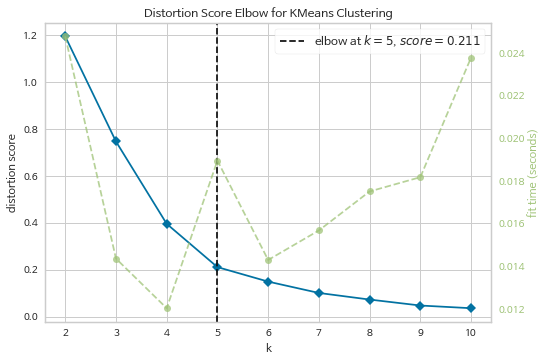

In [35]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(서초_df)
Elbow_M.show()

plt.show()

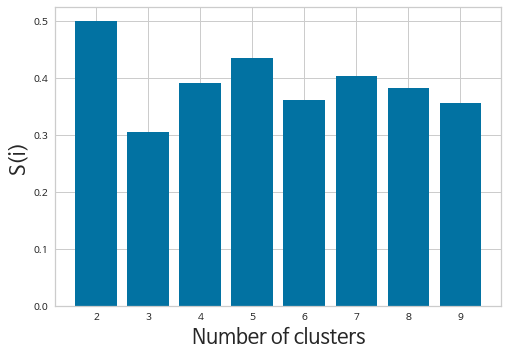

In [36]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(서초_df)
    silhouette_scores.append(silhouette_score(서초_df, m1.fit_predict(서초_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [37]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


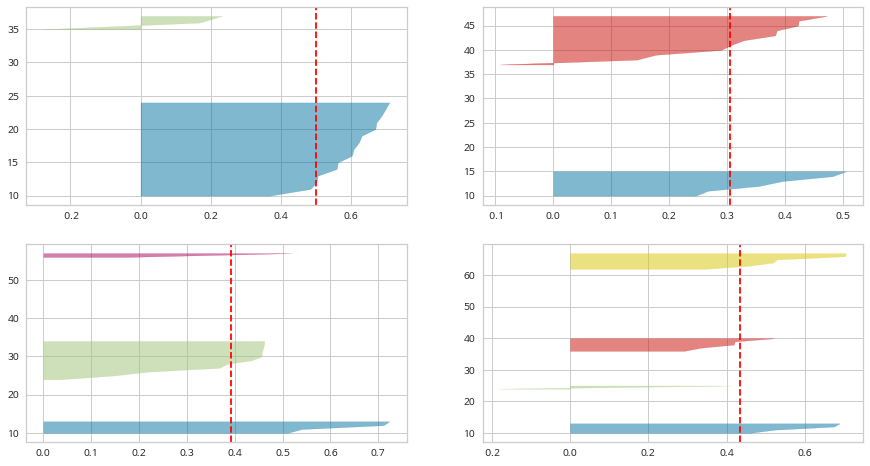

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(서초_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


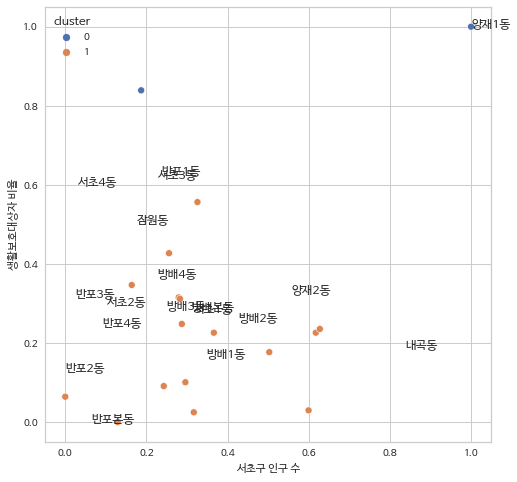

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


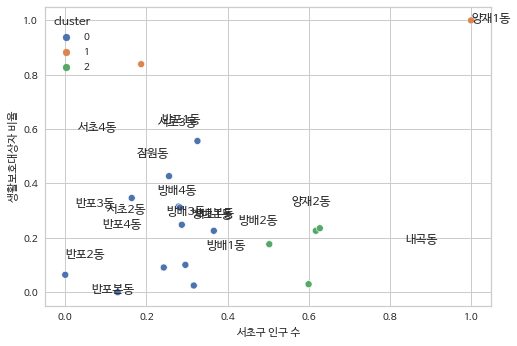

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


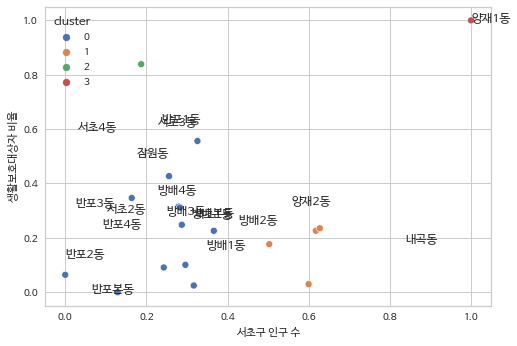

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


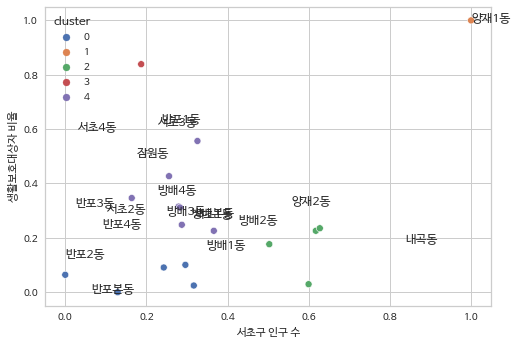

In [39]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(서초_df)
  서초_df['cluster'] = model.fit_predict(서초_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 서초_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 서초_df['생활보호대상자 비율']
  cluster_df['cluster'] = 서초_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('서초구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=5

In [40]:
k = 5

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(서초_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
서초_df['cluster'] = model.fit_predict(서초_df)

In [41]:
서초_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    7
1    5
2    4
3    1
4    1
Name: cluster, dtype: int64

In [42]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.28013878, 0.34723923, 4.        ],
       [0.19694216, 0.05605558, 0.        ],
       [0.58681875, 0.16690777, 2.        ],
       [1.        , 1.        , 1.        ],
       [0.18708775, 0.83901501, 3.        ]])

In [43]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 서초_df['인구 수']
cluster_df['생활보호대상자 비율'] = 서초_df['생활보호대상자 비율']
cluster_df['cluster'] = 서초_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,서초1동,0.279522,0.315116,0
1,서초2동,0.296058,0.100608,1
2,서초3동,0.617526,0.226028,2
3,서초4동,0.599623,0.029514,2
4,잠원동,0.502781,0.176689,2
5,반포본동,0.000000,0.064080,1
6,반포1동,0.627344,0.235400,2
7,반포2동,0.129153,0.000000,1
8,반포3동,0.316757,0.024645,1
9,반포4동,0.242743,0.090945,1


In [44]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,서초1동,0.279522,0.315116,0
1,서초2동,0.296058,0.100608,1
2,서초3동,0.617526,0.226028,2
3,서초4동,0.599623,0.029514,2
4,잠원동,0.502781,0.176689,2
5,반포본동,0.000000,0.064080,1
6,반포1동,0.627344,0.235400,2
7,반포2동,0.129153,0.000000,1
8,반포3동,0.316757,0.024645,1
9,반포4동,0.242743,0.090945,1


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/서초_cluster.csv')

In [45]:
# 클러스터별로 동 이름 출력하기

for i in range(5):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['서초1동', '방배본동', '방배1동', '방배2동', '방배3동', '방배4동', '양재2동']
cluster 1 :  ['서초2동', '반포본동', '반포2동', '반포3동', '반포4동']
cluster 2 :  ['서초3동', '서초4동', '잠원동', '반포1동']
cluster 3 :  ['양재1동']
cluster 4 :  ['내곡동']


### 10. 양천구

In [46]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

양천_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/양천구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =양천_df['동']
양천_df = 양천_df.iloc[:,2:]
양천_df = 양천_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
양천_df

,인구 수,생활보호대상자 비율
0,0.543484,0.100271
1,0.512504,0.319044
2,0.268120,0.483198
3,0.375640,0.389048
4,0.863621,0.000000
5,0.225772,0.905837
6,0.234078,0.366319
7,0.065689,1.000000
8,0.142138,0.214819
9,0.042166,0.513861


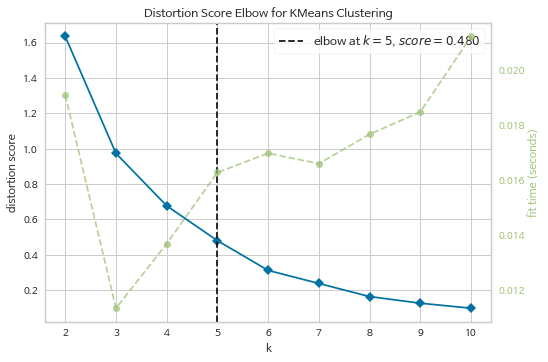

In [47]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(양천_df)
Elbow_M.show()

plt.show()

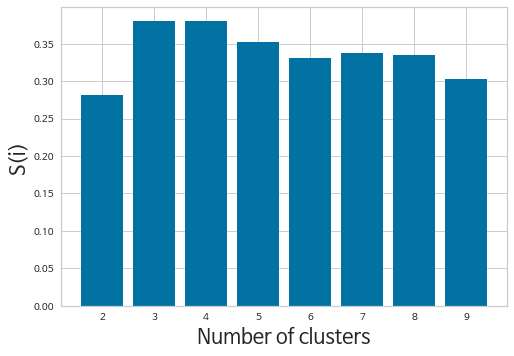

In [48]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(양천_df)
    silhouette_scores.append(silhouette_score(양천_df, m1.fit_predict(양천_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [49]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


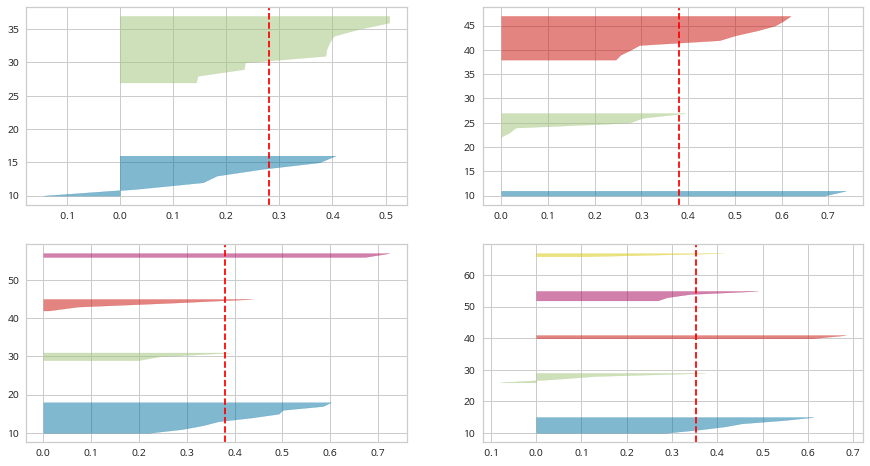

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(양천_df)

k=4

In [51]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(양천_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
양천_df['cluster'] = model.fit_predict(양천_df)

In [52]:
양천_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    9
1    4
3    3
0    2
Name: cluster, dtype: int64

In [53]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.14573039, 0.9529183 ],
       [0.5650823 , 0.10821718],
       [0.18719034, 0.34931309],
       [0.70386088, 0.54537367]])

In [54]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 양천_df['인구 수']
cluster_df['생활보호대상자 비율'] = 양천_df['생활보호대상자 비율']
cluster_df['cluster'] = 양천_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,목1동,0.543484,0.100271,1
1,목2동,0.512504,0.319044,1
2,목3동,0.268120,0.483198,2
3,목4동,0.375640,0.389048,2
4,목5동,0.863621,0.000000,1
5,신월1동,0.225772,0.905837,0
6,신월2동,0.234078,0.366319,2
7,신월3동,0.065689,1.000000,0
8,신월4동,0.142138,0.214819,2
9,신월5동,0.042166,0.513861,2


In [55]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,목1동,0.543484,0.100271,1
1,목2동,0.512504,0.319044,1
2,목3동,0.268120,0.483198,2
3,목4동,0.375640,0.389048,2
4,목5동,0.863621,0.000000,1
5,신월1동,0.225772,0.905837,0
6,신월2동,0.234078,0.366319,2
7,신월3동,0.065689,1.000000,0
8,신월4동,0.142138,0.214819,2
9,신월5동,0.042166,0.513861,2


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/양천_cluster.csv')

#### 10-1. 군집화

In [56]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신월1동', '신월3동']
cluster 1 :  ['목1동', '목2동', '목5동', '신정6동']
cluster 2 :  ['목3동', '목4동', '신월2동', '신월4동', '신월5동', '신월6동', '신월7동', '신정1동', '신정2동']
cluster 3 :  ['신정3동', '신정4동', '신정7동']


#### 10-2. 클러스터별 인구수, 체육시설 수

In [57]:
# 클러스터별로 인구 수 합치기

양천_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/양천구_인구수, 수급인구비율.csv', index_col=0)
양천_peo_df = 양천_peo_df[['동', '인구 수']]
양천_peo_df = 양천_peo_df.rename(columns={'동':'dong'})
양천_peo_df


df_all = pd.merge(cluster_df, 양천_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,목1동,0.543484,0.100271,1,31727.0
1,목2동,0.512504,0.319044,1,30705.0
2,목3동,0.268120,0.483198,2,22643.0
3,목4동,0.375640,0.389048,2,26190.0
4,목5동,0.863621,0.000000,1,42288.0
5,신월1동,0.225772,0.905837,0,21246.0
6,신월2동,0.234078,0.366319,2,21520.0
7,신월3동,0.065689,1.000000,0,15965.0
8,신월4동,0.142138,0.214819,2,18487.0
9,신월5동,0.042166,0.513861,2,15189.0


In [58]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  37211.0
cluster 1 :  129758.0
cluster 2 :  179759.0
cluster 3 :  111053.0


In [59]:
# a+b+c=11

def prop(a, b, c, d):
  
  p1 = a*10000/37211.0
  p2 = b*10000/129758.0
  p3 = c*10000/179759.0
  p4 = d*10000/111053.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [60]:
lst = []

for i, j, k, l in product(range(12), range(12), range(12), range(12)):
  if (i+j+k+l==11):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [61]:
lst.sort()
lst

[[0.0074067045011526845, (1, 3, 4, 3)],
 [0.02378648398327754, (1, 3, 5, 2)],
 [0.03713663306285485, (1, 4, 4, 2)],
 [0.042127082580736455, (1, 2, 5, 3)],
 [0.0440389000441282, (1, 4, 3, 3)],
 [0.0782833004741943, (1, 3, 3, 4)],
 [0.08178890852625953, (1, 2, 6, 2)],
 [0.08972163209037985, (1, 2, 4, 4)],
 [0.11749074153674793, (1, 4, 5, 1)],
 [0.12183935576499147, (1, 5, 3, 2)],
 [0.12742263892056888, (1, 3, 6, 1)],
 [0.13819754248056804, (1, 4, 2, 4)],
 [0.14820003428287948, (1, 1, 6, 3)],
 [0.1520236692096631, (1, 5, 2, 3)],
 [0.17251253732912467, (1, 1, 5, 4)],
 [0.17891141777548636, (1, 5, 4, 1)],
 [0.20758205686523545, (0, 3, 5, 3)],
 [0.20870710992694907, (1, 2, 7, 1)],
 [0.21114390669180083, (1, 1, 7, 2)],
 [0.22457255705518964, (1, 2, 3, 5)],
 [0.22859321038243202, (0, 4, 4, 3)],
 [0.23177947280126804, (0, 4, 5, 2)],
 [0.23405036574746974, (0, 3, 6, 2)],
 [0.23641627190240228, (1, 3, 2, 5)],
 [0.2579234769705982, (0, 2, 6, 3)],
 [0.26837012343816774, (0, 3, 4, 4)],
 [0.269464358

#### **공공체육시설 입지 선정 모델 결과** 
- cluster 0 :  '신월1동', '신월3동' (1개)
- cluster 1 :  '목1동', '목2동', '목5동', '신정6동' (3개)
- cluster 2 :  '목3동', '목4동', '신월2동', '신월4동', '신월5동', '신월6동', '신월7동', '신정1동', '신정2동' (4개)
- cluster 3 :  '신정3동', '신정4동', '신정7동' (3개)

#### **2020년 기준 양천구 공공체육시설 설치 개수**
- cluster 0 :  신월1동(1개) = 1개
- cluster 1 :  목1동(3개) + 목2동(1개) + 목5동(2개) + 신정6동(2개) = 8개
- cluster 2 :  신월7동(1개) + 신정1동(1개) + 신정2동(1개) = 3개
- cluster 3 :  신정3동(1개) + 신정4동(1개) = 2개

### 11. 영등포구

In [62]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

영등포_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/영등포구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =영등포_df['동']
영등포_df = 영등포_df.iloc[:,2:]
영등포_df = 영등포_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
영등포_df

,인구 수,생활보호대상자 비율
0,0.860945,0.000000
1,0.341015,0.377683
2,1.000000,0.047494
3,0.204037,0.228412
4,0.396120,0.127156
5,0.261454,0.707621
6,0.219087,0.760767
7,0.018734,0.916069
8,0.000000,0.736405
9,0.257692,0.378823


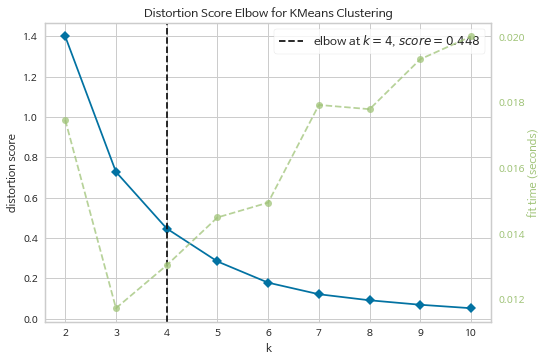

In [63]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(영등포_df)
Elbow_M.show()

plt.show()

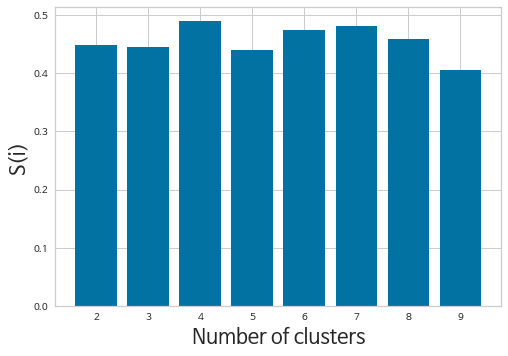

In [64]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(영등포_df)
    silhouette_scores.append(silhouette_score(영등포_df, m1.fit_predict(영등포_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [65]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  4


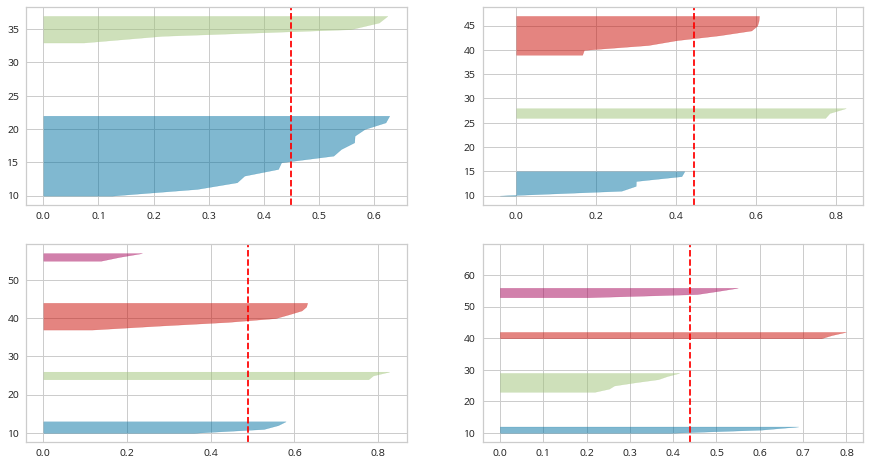

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(영등포_df)

k=4

In [67]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(영등포_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
영등포_df['cluster'] = model.fit_predict(영등포_df)

In [68]:
영등포_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

3    7
0    5
2    3
1    3
Name: cluster, dtype: int64

In [69]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.16388791, 0.73568134],
       [0.54901039, 0.72930332],
       [0.89339604, 0.04114993],
       [0.28622939, 0.30284943]])

In [70]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 영등포_df['인구 수']
cluster_df['생활보호대상자 비율'] = 영등포_df['생활보호대상자 비율']
cluster_df['cluster'] = 영등포_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,여의동,0.860945,0.000000,2
1,당산1동,0.341015,0.377683,3
2,당산2동,1.000000,0.047494,2
3,양평1동,0.204037,0.228412,3
4,양평2동,0.396120,0.127156,3
5,신길1동,0.261454,0.707621,0
6,신길3동,0.219087,0.760767,0
7,신길4동,0.018734,0.916069,0
8,신길5동,0.000000,0.736405,0
9,신길6동,0.257692,0.378823,3


In [71]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,여의동,0.860945,0.000000,2
1,당산1동,0.341015,0.377683,3
2,당산2동,1.000000,0.047494,2
3,양평1동,0.204037,0.228412,3
4,양평2동,0.396120,0.127156,3
5,신길1동,0.261454,0.707621,0
6,신길3동,0.219087,0.760767,0
7,신길4동,0.018734,0.916069,0
8,신길5동,0.000000,0.736405,0
9,신길6동,0.257692,0.378823,3


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/영등포_cluster.csv')

#### 11.1 군집화

In [72]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['신길1동', '신길3동', '신길4동', '신길5동', '도림동']
cluster 1 :  ['대림3동', '영등포본동', '영등포동']
cluster 2 :  ['여의동', '당산2동', '문래동']
cluster 3 :  ['당산1동', '양평1동', '양평2동', '신길6동', '신길7동', '대림1동', '대림2동']


#### 11-2. 클러스터별 인구수, 체육시설 수

In [73]:
# 클러스터별로 인구 수 합치기

영등포_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/영등포구_인구수, 수급인구비율.csv', index_col=0)
영등포_peo_df = 영등포_peo_df[['동', '인구 수']]
영등포_peo_df = 영등포_peo_df.rename(columns={'동':'dong'})
영등포_peo_df


df_all = pd.merge(cluster_df, 영등포_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,여의동,0.860945,0.000000,2,34463.0
1,당산1동,0.341015,0.377683,3,21197.0
2,당산2동,1.000000,0.047494,2,38011.0
3,양평1동,0.204037,0.228412,3,17702.0
4,양평2동,0.396120,0.127156,3,22603.0
5,신길1동,0.261454,0.707621,0,19167.0
6,신길3동,0.219087,0.760767,0,18086.0
7,신길4동,0.018734,0.916069,0,12974.0
8,신길5동,0.000000,0.736405,0,12496.0
9,신길6동,0.257692,0.378823,3,19071.0


In [74]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  83388.0
cluster 1 :  79512.0
cluster 2 :  105873.0
cluster 3 :  138594.0


In [75]:
# a+b+c=8

def prop(a, b, c, d):
  
  p1 = a*10000/83388.0
  p2 = b*10000/79512.0
  p3 = c*10000/105873.0
  p4 = d*10000/138594.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [76]:
lst = []

for i, j, k, l in product(range(9), range(9), range(9), range(9)):
  if (i+j+k+l==8):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [77]:
lst.sort()
lst

[[0.029125364358123473, (2, 1, 2, 3)],
 [0.029267750911140308, (2, 2, 2, 2)],
 [0.037312277612264334, (1, 2, 2, 3)],
 [0.06261219883208753, (2, 2, 1, 3)],
 [0.06854814572196166, (2, 1, 3, 2)],
 [0.07360101215295577, (1, 1, 3, 3)],
 [0.0736964800519315, (1, 1, 2, 4)],
 [0.0764743389157532, (1, 2, 3, 2)],
 [0.10172734148153526, (2, 1, 1, 4)],
 [0.10794806147744308, (2, 2, 3, 1)],
 [0.11017497479602548, (1, 2, 1, 4)],
 [0.13668833439323747, (3, 1, 2, 2)],
 [0.1633668938533043, (1, 3, 2, 2)],
 [0.1671835085970716, (3, 2, 1, 2)],
 [0.16977206225383532, (3, 1, 1, 3)],
 [0.17335730993893828, (3, 2, 2, 1)],
 [0.18553030274123006, (1, 1, 4, 2)],
 [0.18581670643815723, (1, 1, 1, 5)],
 [0.1859358748633469, (2, 3, 1, 2)],
 [0.19142179648581378, (2, 0, 2, 4)],
 [0.19158704864718737, (2, 0, 3, 3)],
 [0.19184895614486425, (2, 3, 2, 1)],
 [0.19697206183460084, (1, 3, 1, 3)],
 [0.1971347020829853, (0, 2, 3, 3)],
 [0.19749089004231038, (0, 2, 2, 4)],
 [0.20798140524028474, (2, 2, 0, 4)],
 [0.21562936501

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '신길1동', '신길3동', '신길4동', '신길5동', '도림동' (2개)
- cluster 1 :  '대림3동', '영등포본동', '영등포동' (1개)
- cluster 2 :  '여의동', '당산2동', '문래동' (2개)
- cluster 3 :  '당산1동', '양평1동', '양평2동', '신길6동', '신길7동', '대림1동', '대림2동' (3개)

#### **2020년 기준 영등포구 공공체육시설 설치 개수**
- cluster 0 : 신길1동(1개) + 신길5동(1개) = 2개
- cluster 1 : 0개
- cluster 2 : 여의동(5개) + 당산2동(1개) + 문래동(2개) = 8개
- cluster 3 : 0개

### 12. 용산구

In [78]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

용산_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/용산구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =용산_df['동']
용산_df = 용산_df.iloc[:,2:]
용산_df = 용산_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
용산_df

,인구 수,생활보호대상자 비율
0,0.483857,0.284081
1,0.151403,0.319897
2,0.000000,1.000000
3,0.413241,0.123170
4,0.298153,0.185907
5,0.106021,0.068172
6,0.208155,0.181712
7,1.000000,0.000000
8,0.033197,0.109059
9,0.031087,0.157028


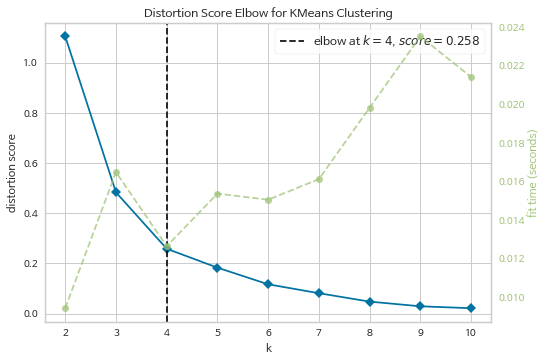

In [79]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(용산_df)
Elbow_M.show()

plt.show()

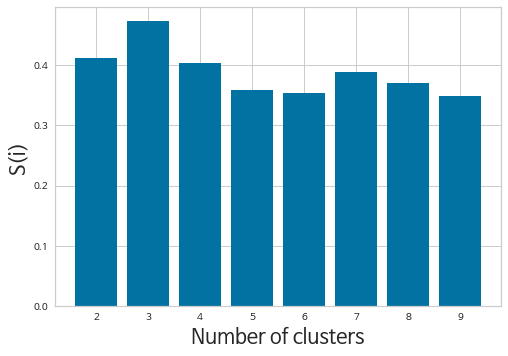

In [80]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(용산_df)
    silhouette_scores.append(silhouette_score(용산_df, m1.fit_predict(용산_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [81]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  3


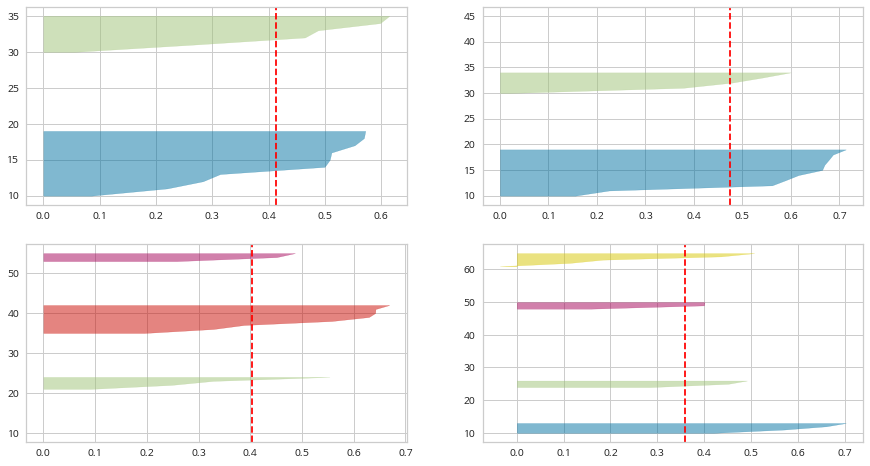

In [82]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(용산_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


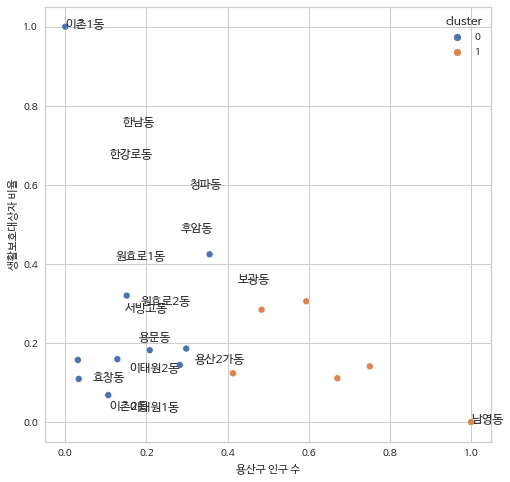

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


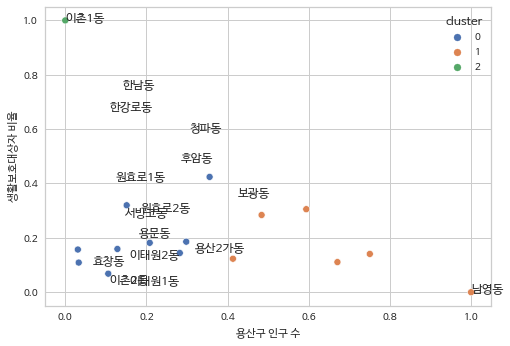

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


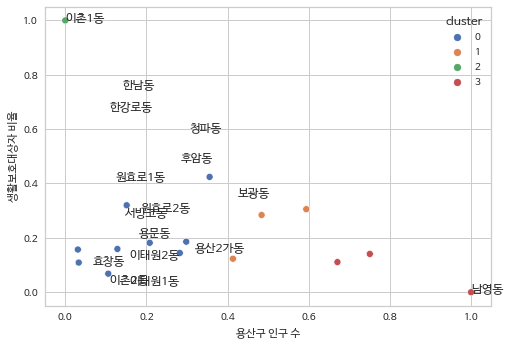

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


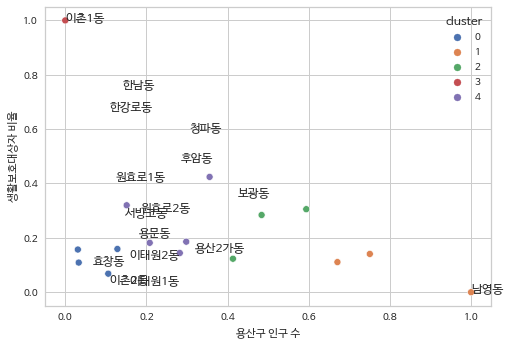

In [83]:
plt.figure(figsize = (8, 8))

for i in range(2,6):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(용산_df)
  용산_df['cluster'] = model.fit_predict(용산_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 용산_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 용산_df['생활보호대상자 비율']
  cluster_df['cluster'] = 용산_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('용산구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4

In [84]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(용산_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
용산_df['cluster'] = model.fit_predict(용산_df)

In [85]:
용산_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    6
2    4
3    3
1    3
Name: cluster, dtype: int64

In [86]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.21595107, 0.37599059, 3.83333333],
       [0.80708403, 0.0838812 , 1.        ],
       [0.07470616, 0.12333163, 0.        ],
       [0.49700168, 0.23757968, 2.        ]])

In [87]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 용산_df['인구 수']
cluster_df['생활보호대상자 비율'] = 용산_df['생활보호대상자 비율']
cluster_df['cluster'] = 용산_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,후암동,0.483857,0.284081,3
1,용산2가동,0.151403,0.319897,0
2,남영동,0.000000,1.000000,0
3,원효로1동,0.413241,0.123170,3
4,원효로2동,0.298153,0.185907,0
5,효창동,0.106021,0.068172,2
6,용문동,0.208155,0.181712,0
7,이촌1동,1.000000,0.000000,1
8,이촌2동,0.033197,0.109059,2
9,이태원1동,0.031087,0.157028,2


In [88]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,후암동,0.483857,0.284081,3
1,용산2가동,0.151403,0.319897,0
2,남영동,0.000000,1.000000,0
3,원효로1동,0.413241,0.123170,3
4,원효로2동,0.298153,0.185907,0
5,효창동,0.106021,0.068172,2
6,용문동,0.208155,0.181712,0
7,이촌1동,1.000000,0.000000,1
8,이촌2동,0.033197,0.109059,2
9,이태원1동,0.031087,0.157028,2


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/용산_cluster.csv')

#### 12-1. 군집화 

In [89]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['용산2가동', '남영동', '원효로2동', '용문동', '서빙고동', '보광동']
cluster 1 :  ['이촌1동', '한강로동', '한남동']
cluster 2 :  ['효창동', '이촌2동', '이태원1동', '이태원2동']
cluster 3 :  ['후암동', '원효로1동', '청파동']


#### 12-2. 클러스터별 인구수, 체육시설 수

In [90]:
# 클러스터별로 인구 수 합치기

용산_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/용산구_인구수, 수급인구비율.csv', index_col=0)
용산_peo_df = 용산_peo_df[['동', '인구 수']]
용산_peo_df = 용산_peo_df.rename(columns={'동':'dong'})
용산_peo_df


df_all = pd.merge(cluster_df, 용산_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,후암동,0.483857,0.284081,3,18202.0
1,용산2가동,0.151403,0.319897,0,11272.0
2,남영동,0.000000,1.000000,0,8116.0
3,원효로1동,0.413241,0.123170,3,16730.0
4,원효로2동,0.298153,0.185907,0,14331.0
5,효창동,0.106021,0.068172,2,10326.0
6,용문동,0.208155,0.181712,0,12455.0
7,이촌1동,1.000000,0.000000,1,28961.0
8,이촌2동,0.033197,0.109059,2,8808.0
9,이태원1동,0.031087,0.157028,2,8764.0


In [91]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  75705.0
cluster 1 :  74819.0
cluster 2 :  38693.0
cluster 3 :  55428.0


In [92]:
# a+b+c=5

def prop(a, b, c, d):
  
  p1 = a*10000/75705.0
  p2 = b*10000/74819.0
  p3 = c*10000/38693.0
  p4 = d*10000/55428.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [93]:
lst = []

for i, j, k, l in product(range(6), range(6), range(6), range(6)):
  if (i+j+k+l==5):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [94]:
lst.sort()
lst

[[0.047934948228209345, (2, 1, 1, 1)],
 [0.05030319016882026, (1, 2, 1, 1)],
 [0.14595010763365193, (1, 1, 1, 2)],
 [0.1883759559775764, (2, 2, 0, 1)],
 [0.20816342348020442, (2, 2, 1, 0)],
 [0.28663932064943226, (2, 0, 1, 2)],
 [0.2877528532378884, (0, 2, 1, 2)],
 [0.29583898767235517, (2, 1, 0, 2)],
 [0.2984513428667745, (1, 2, 0, 2)],
 [0.32519810444678265, (3, 1, 0, 1)],
 [0.32805866490761526, (3, 0, 1, 1)],
 [0.334045766128387, (1, 3, 0, 1)],
 [0.335163390729448, (0, 3, 1, 1)],
 [0.34522968520321906, (3, 1, 1, 0)],
 [0.3535891203772066, (1, 3, 1, 0)],
 [0.41267652490596596, (1, 1, 2, 1)],
 [0.47361046546883073, (3, 2, 0, 0)],
 [0.47984577195601574, (2, 3, 0, 0)],
 [0.5536098511755547, (2, 0, 2, 1)],
 [0.554235157256394, (0, 2, 2, 1)],
 [0.5757185910979528, (3, 0, 0, 2)],
 [0.5825969857011056, (2, 1, 2, 0)],
 [0.5835556566812106, (0, 3, 0, 2)],
 [0.5847211143879081, (1, 2, 2, 0)],
 [0.6380659604912786, (0, 1, 2, 2)],
 [0.6392751634195469, (0, 1, 1, 3)],
 [0.6395647830972419, (1, 0,

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 : '용산2가동', '남영동', '원효로2동', '용문동', '서빙고동', '보광동' (2개)
- cluster 1 : '이촌1동', '한강로동', '한남동' (1개)
- cluster 2 : '효창동', '이촌2동', '이태원1동', '이태원2동' (1개)
- cluster 3 : '후암동', '원효로1동', '청파동' (1개)

#### **2020년 기준 용산구 공공체육시설 설치 개수**
- cluster 0 : 원효로2동(1개) = 1개
- cluster 1 : 이촌1동(1개) + 한강로동(1개) + 한남동(3개) = 5개
- cluster 2 : 이태원1동(1개) = 1개
- cluster 3 : 후암동(1개) + 원효로1동(1개) = 2개

### 13. 종로구

In [95]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

종로_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/종로구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =종로_df['동']
종로_df = 종로_df.iloc[:,2:]
종로_df = 종로_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
종로_df

,인구 수,생활보호대상자 비율
0,0.409926,0.067780
1,0.000000,0.078787
2,0.441248,0.083738
3,0.931530,0.000000
4,0.337771,0.125039
5,0.459138,0.154979
6,0.089688,0.099301
7,0.329212,1.000000
8,0.163269,0.516658
9,0.309183,0.299437


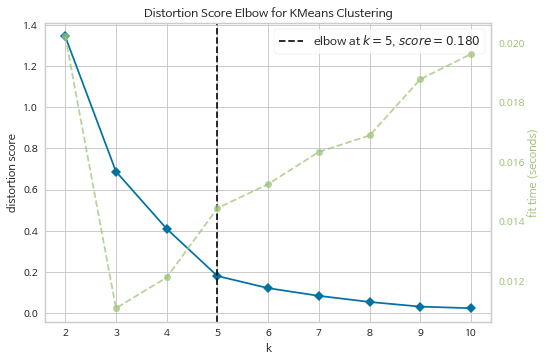

In [96]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(종로_df)
Elbow_M.show()

plt.show()

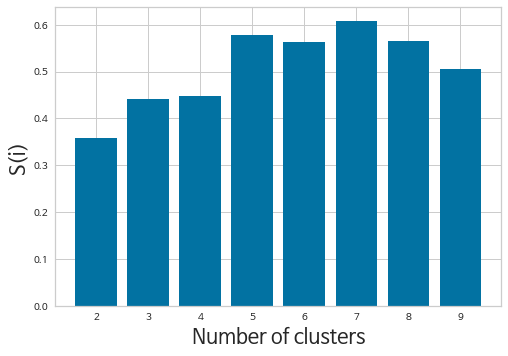

In [97]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(종로_df)
    silhouette_scores.append(silhouette_score(종로_df, m1.fit_predict(종로_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [98]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  7


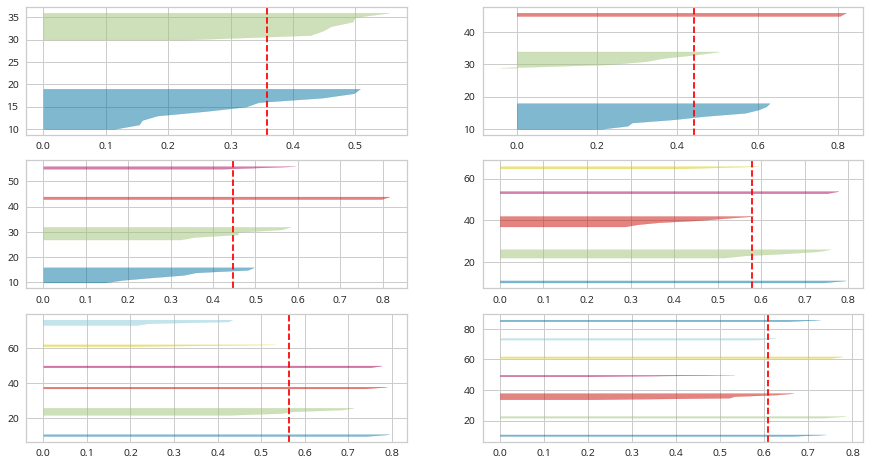

In [99]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6, 7]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(종로_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


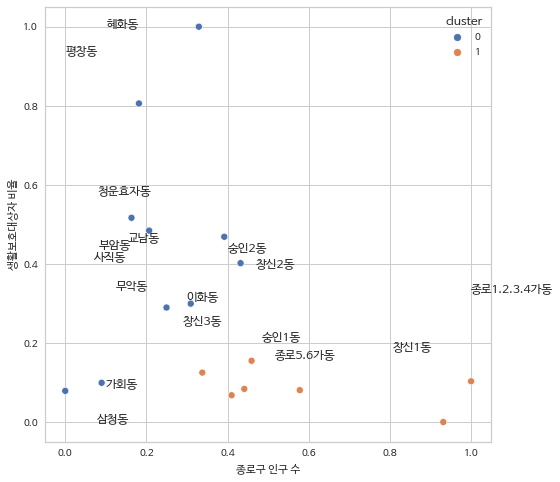

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


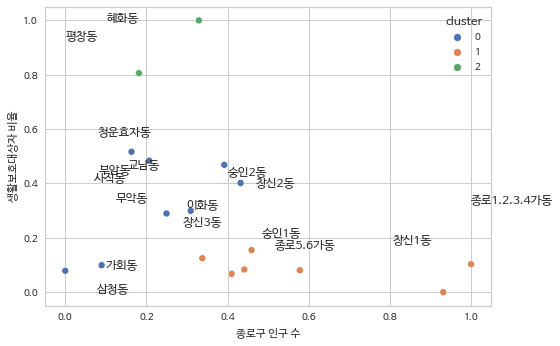

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


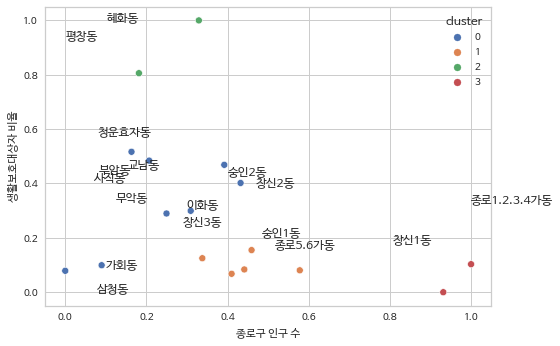

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


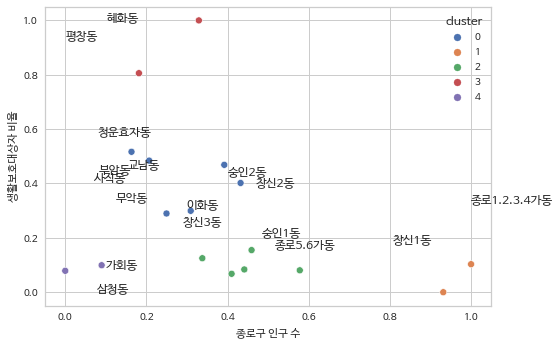

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


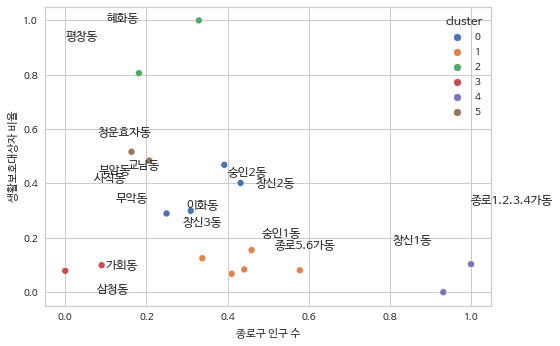

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


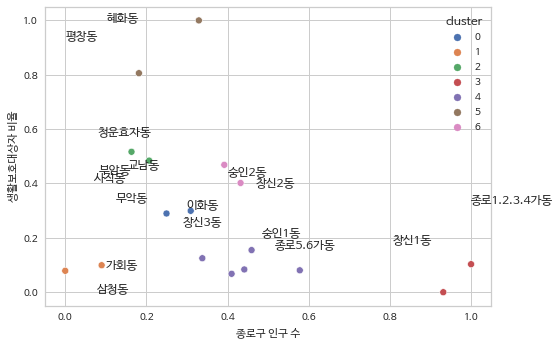

In [100]:
plt.figure(figsize = (8, 8))

for i in range(2,8):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(종로_df)
  종로_df['cluster'] = model.fit_predict(종로_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 종로_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 종로_df['생활보호대상자 비율']
  cluster_df['cluster'] = 종로_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('종로구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=5

In [101]:
k = 5

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(종로_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
종로_df['cluster'] = model.fit_predict(종로_df)

In [102]:
종로_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

2    5
3    4
0    4
4    2
1    2
Name: cluster, dtype: int64

In [103]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.33368499, 0.66910073, 5.5       ],
       [0.18502229, 0.50045385, 2.        ],
       [0.44520654, 0.10242631, 4.        ],
       [0.1620951 , 0.19178696, 0.5       ],
       [0.96576523, 0.05153012, 3.        ]])

In [104]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 종로_df['인구 수']
cluster_df['생활보호대상자 비율'] = 종로_df['생활보호대상자 비율']
cluster_df['cluster'] = 종로_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,사직동,0.409926,0.067780,2
1,삼청동,0.000000,0.078787,3
2,부암동,0.441248,0.083738,2
3,평창동,0.931530,0.000000,4
4,무악동,0.337771,0.125039,2
5,교남동,0.459138,0.154979,2
6,가회동,0.089688,0.099301,3
7,종로1.2.3.4가동,0.329212,1.000000,0
8,종로5.6가동,0.163269,0.516658,1
9,이화동,0.309183,0.299437,3


In [105]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,사직동,0.409926,0.067780,2
1,삼청동,0.000000,0.078787,3
2,부암동,0.441248,0.083738,2
3,평창동,0.931530,0.000000,4
4,무악동,0.337771,0.125039,2
5,교남동,0.459138,0.154979,2
6,가회동,0.089688,0.099301,3
7,종로1.2.3.4가동,0.329212,1.000000,0
8,종로5.6가동,0.163269,0.516658,1
9,이화동,0.309183,0.299437,3


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/종로_cluster.csv')

####13-1. 군집화

In [106]:
# 클러스터별로 동 이름 출력하기

for i in range(5):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['종로1.2.3.4가동', '창신1동', '창신2동', '숭인2동']
cluster 1 :  ['종로5.6가동', '숭인1동']
cluster 2 :  ['사직동', '부암동', '무악동', '교남동', '청운효자동']
cluster 3 :  ['삼청동', '가회동', '이화동', '창신3동']
cluster 4 :  ['평창동', '혜화동']


#### 13-2. 클러스터별 인구수, 체육시설 수

In [107]:
# 클러스터별로 인구 수 합치기

종로_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/종로구_인구수, 수급인구비율.csv', index_col=0)
종로_peo_df = 종로_peo_df[['동', '인구 수']]
종로_peo_df = 종로_peo_df.rename(columns={'동':'dong'})
종로_peo_df


df_all = pd.merge(cluster_df, 종로_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,사직동,0.409926,0.067780,2,9806.0
1,삼청동,0.000000,0.078787,3,2909.0
2,부암동,0.441248,0.083738,2,10333.0
3,평창동,0.931530,0.000000,4,18582.0
4,무악동,0.337771,0.125039,2,8592.0
5,교남동,0.459138,0.154979,2,10634.0
6,가회동,0.089688,0.099301,3,4418.0
7,종로1.2.3.4가동,0.329212,1.000000,0,8448.0
8,종로5.6가동,0.163269,0.516658,1,5656.0
9,이화동,0.309183,0.299437,3,8111.0


In [108]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  34093.0
cluster 1 :  12044.0
cluster 2 :  51998.0
cluster 3 :  22545.0
cluster 4 :  38316.0


In [109]:
# a+b+c+d+e = 3

def prop(a, b, c, d, e):
  
  p1 = a*10000/34093.0
  p2 = b*10000/12044.0
  p3 = c*10000/51998.0
  p4 = d*10000/22545.0
  p5 = e*10000/38316.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2 + (p1-p5)**2 + (p2-p5)**2 + (p3-p5)**2 + (p4-p5)**2)


In [110]:
lst = []

for i, j, k, l, m in product(range(4), range(4), range(4), range(4), range(4)):
  if (i+j+k+l+m==3):
    lst.append([prop(i,j,k,l,m), (i,j,k,l,m)])

In [111]:
lst.sort()
lst

[[0.3982290453371411, (1, 0, 1, 0, 1)],
 [0.6634521605145915, (0, 0, 2, 0, 1)],
 [0.7048557160155888, (0, 0, 1, 1, 1)],
 [0.7102611926158344, (1, 0, 2, 0, 0)],
 [0.7354205472127543, (1, 0, 1, 1, 0)],
 [0.7587324751663164, (1, 0, 0, 1, 1)],
 [1.0370052229620257, (0, 0, 1, 0, 2)],
 [1.0375228453035326, (0, 0, 2, 1, 0)],
 [1.1277611650260808, (1, 0, 0, 0, 2)],
 [1.2988467585002121, (2, 0, 1, 0, 0)],
 [1.3314633650347905, (0, 0, 3, 0, 0)],
 [1.3427936684630244, (2, 0, 0, 0, 1)],
 [1.4137528536952784, (0, 0, 0, 1, 2)],
 [1.6431059874253098, (2, 0, 0, 1, 0)],
 [2.3005460326966194, (1, 1, 0, 0, 1)],
 [2.32478925559982, (0, 1, 1, 0, 1)],
 [2.3303497485031155, (1, 1, 1, 0, 0)],
 [2.404788077854596, (1, 1, 0, 1, 0)],
 [2.415471785855378, (0, 1, 0, 1, 1)],
 [2.452122552377092, (0, 0, 0, 0, 3)],
 [2.465910483671125, (0, 1, 1, 1, 0)],
 [2.7105720286478223, (0, 1, 2, 0, 0)],
 [2.9546189812959267, (0, 0, 1, 2, 0)],
 [2.957295927240238, (0, 0, 0, 2, 1)],
 [2.9716165575333258, (1, 0, 0, 2, 0)],
 [2.980

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 :  '종로1.2.3.4가동', '창신1동' (1개)
- cluster 1 :  '삼청동', '가회동', '이화동', '창신3동' (0개)
- cluster 2 :  '사직동', '부암동', '무악동', '교남동', '청운효자동' (1개)
- cluster 3 :  '평창동', '혜화동' (0개)
- cluster 4 :  '종로5.6가동', '창신2동', '숭인1동', '숭인2동' (1개)

#### **2020년 기준 종로구 공공체육시설 설치 개수**
- cluster 0 :  종로1.2.3.4가동(2개) + 창신1동(1개) = 3개
- cluster 1 :  0개
- cluster 2 :  사직동(1개) + 청운효자동(2개) = 3개
- cluster 3 :  평창동(1개) + 혜화동(1개) = 2개
- cluster 4 :  종로5.6가동(2개) = 2개

### 14. 은평구

In [112]:
# 동별 정규화한 인구수, 정규화한 생활보호대상자 비율 데이터 불러오기

은평_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/은평구_인구수, 수급인구비율.csv', index_col=0)

동_df = pd.DataFrame()
동_df['동'] =은평_df['동']
은평_df = 은평_df.iloc[:,2:]
은평_df = 은평_df.rename(columns={'인구수_scaled':'인구 수', '수급인구비율_scaled':'생활보호대상자 비율'})
은평_df

,인구 수,생활보호대상자 비율
0,0.577351,0.322738
1,0.625332,0.345199
2,0.380060,0.927228
3,0.263881,1.000000
4,0.390908,0.490290
5,0.472608,0.385243
6,0.354820,0.564025
7,0.434954,0.198100
8,0.359103,0.234493
9,0.310774,0.879632


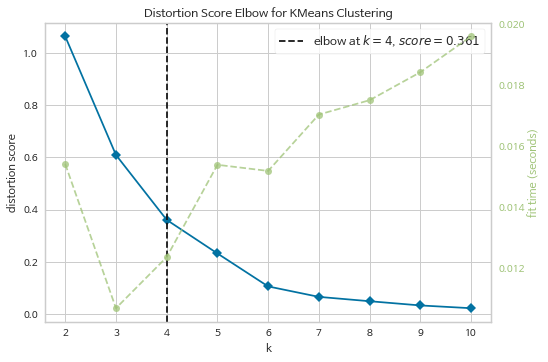

In [113]:
# 적절한 k값을 찾기 위해 Elbow Method 사용

km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(은평_df)
Elbow_M.show()

plt.show()

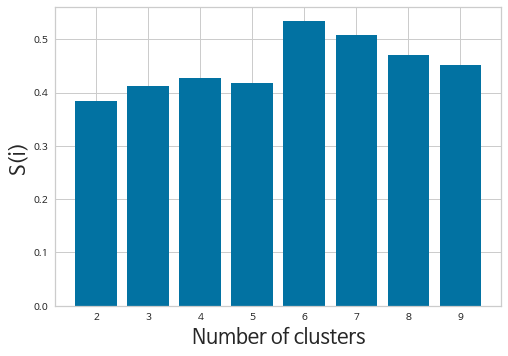

In [114]:
# 적절한 k값을 찾기 위해 Silhouette Method 사용

silhouette_scores = []

for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(은평_df)
    silhouette_scores.append(silhouette_score(은평_df, m1.fit_predict(은평_df))) 

plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [115]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)  #  Silhouette Method 사용 결과 적절한 k값 출력

Number of Cluster Required is :  6


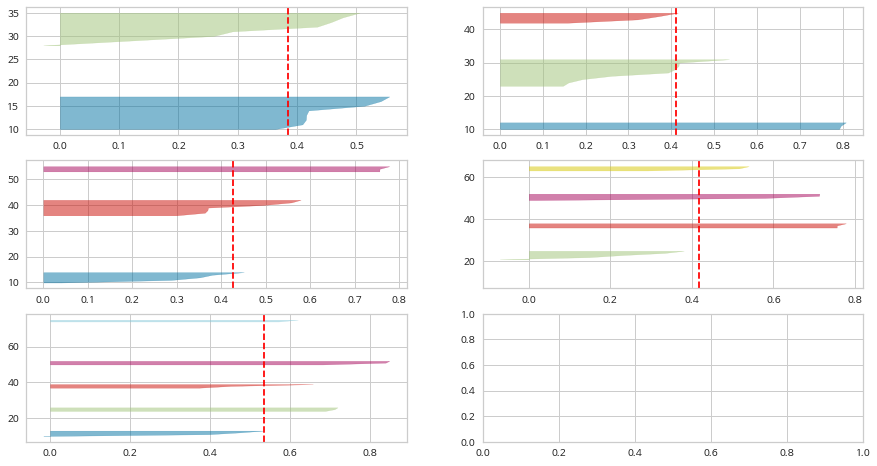

In [116]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))

for i in [2, 3, 4, 5, 6]:
    # Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(은평_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


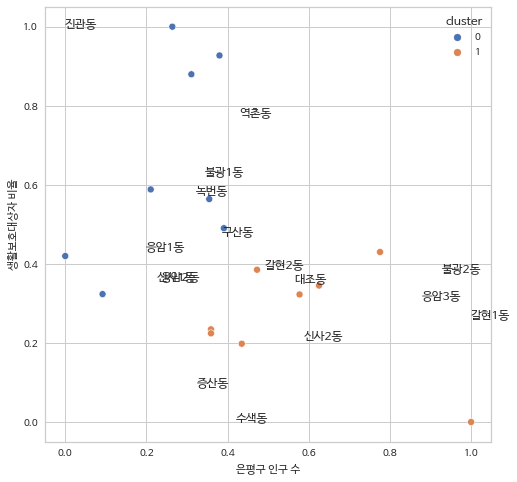

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


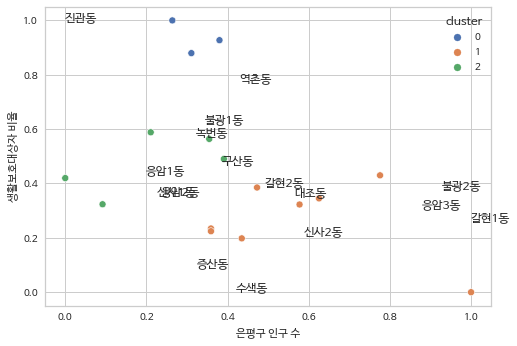

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


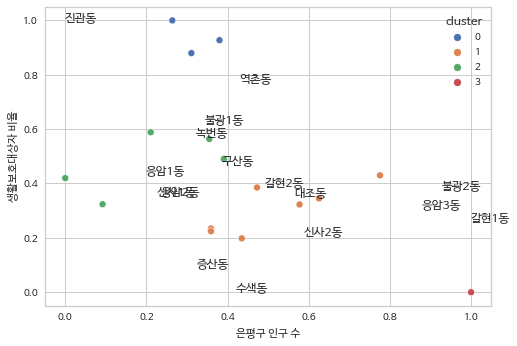

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


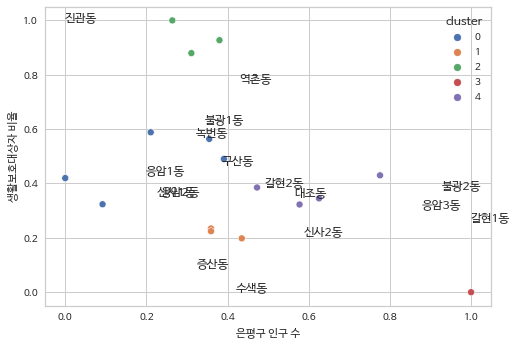

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


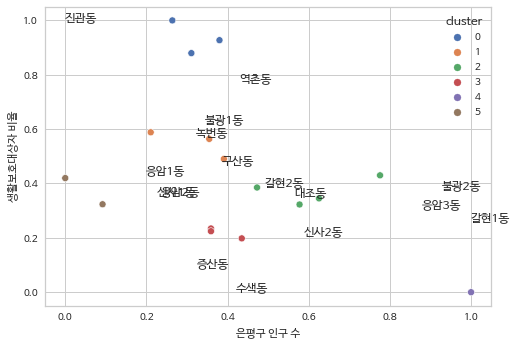

In [117]:
plt.figure(figsize = (8, 8))

for i in range(2,7):

  k = i
  model = KMeans(n_clusters = k, random_state = 10)
  model.fit(은평_df)
  은평_df['cluster'] = model.fit_predict(은평_df)

  cluster_df = pd.DataFrame()
  cluster_df['동'] = 동_df['동']
  cluster_df['인구 수'] = 은평_df['인구 수']
  cluster_df['생활보호대상자 비율'] = 은평_df['생활보호대상자 비율']
  cluster_df['cluster'] = 은평_df['cluster']

  cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})

  sns.scatterplot(cluster_df['population'], cluster_df['ratio'], hue=cluster_df['cluster'], palette='deep')

  for index, dong, population, ratio, cluster in cluster_df.itertuples():
    plt.annotate(dong, (ratio, population))
  plt.xlabel('은평구 인구 수')
  plt.ylabel('생활보호대상자 비율')
  
  plt.show()

k=4

In [118]:
k = 4

# 그룹 수, random_state 설정 (실행할 때마다 같은 결과가 나오도록 고정)
model = KMeans(n_clusters = k, random_state=np.random.RandomState(seed=1))

# 정규화된 데이터에 학습
model.fit(은평_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
은평_df['cluster'] = model.fit_predict(은평_df)

In [119]:
은평_df['cluster'].value_counts()  # 군집별로 몇 개의 동이 있는지 확인

0    6
3    4
1    4
2    2
Name: cluster, dtype: int64

In [120]:
centers = model.cluster_centers_  # 각 군집의 중심점
centers

array([[0.3185066 , 0.74158579, 0.5       ],
       [0.53828971, 0.16423774, 3.25      ],
       [0.04596939, 0.37173493, 5.        ],
       [0.61274947, 0.37080663, 2.        ]])

In [121]:
# 동, 정규화한 인구 수, 정규화한 생활보호대상자 비율, 클러스터 넘버를 데이터프레임으로 만들기

cluster_df = pd.DataFrame()
cluster_df['동'] = 동_df['동']
cluster_df['인구 수'] = 은평_df['인구 수']
cluster_df['생활보호대상자 비율'] = 은평_df['생활보호대상자 비율']
cluster_df['cluster'] = 은평_df['cluster']
cluster_df

,동,인구 수,생활보호대상자 비율,cluster
0,녹번동,0.577351,0.322738,3
1,불광1동,0.625332,0.345199,3
2,불광2동,0.380060,0.927228,0
3,갈현1동,0.263881,1.000000,0
4,갈현2동,0.390908,0.490290,0
5,구산동,0.472608,0.385243,3
6,대조동,0.354820,0.564025,0
7,응암1동,0.434954,0.198100,1
8,응암2동,0.359103,0.234493,1
9,응암3동,0.310774,0.879632,0


In [122]:
cluster_df = cluster_df.rename(columns={'동':'dong', '인구 수':'population', '생활보호대상자 비율':'ratio'})
cluster_df

,dong,population,ratio,cluster
0,녹번동,0.577351,0.322738,3
1,불광1동,0.625332,0.345199,3
2,불광2동,0.380060,0.927228,0
3,갈현1동,0.263881,1.000000,0
4,갈현2동,0.390908,0.490290,0
5,구산동,0.472608,0.385243,3
6,대조동,0.354820,0.564025,0
7,응암1동,0.434954,0.198100,1
8,응암2동,0.359103,0.234493,1
9,응암3동,0.310774,0.879632,0


In [ ]:
cluster_df.to_csv('/content/drive/MyDrive/project/15. 모델 평가/은평_cluster.csv')

####14-1. 군집화

In [123]:
# 클러스터별로 동 이름 출력하기

for i in range(4):
  lst = []
  for j in range(len(cluster_df)):
    if cluster_df['cluster'][j] == i:
      lst.append(cluster_df['dong'][j])
  print('cluster ' + str(i) + ' : ', lst)

cluster 0 :  ['불광2동', '갈현1동', '갈현2동', '대조동', '응암3동', '신사2동']
cluster 1 :  ['응암1동', '응암2동', '신사1동', '진관동']
cluster 2 :  ['증산동', '수색동']
cluster 3 :  ['녹번동', '불광1동', '구산동', '역촌동']


####14-2. 클러스터별 인구수, 체육시설 수

In [125]:
# 클러스터별로 인구 수 합치기

은평_peo_df = pd.read_csv('/content/drive/MyDrive/project/15. 모델 평가/은평구_인구수, 수급인구비율.csv', index_col=0)
은평_peo_df = 은평_peo_df[['동', '인구 수']]
은평_peo_df = 은평_peo_df.rename(columns={'동':'dong'})
은평_peo_df


df_all = pd.merge(cluster_df, 은평_peo_df, on='dong')
df_all

,dong,population,ratio,cluster,인구 수
0,녹번동,0.577351,0.322738,3,37815.0
1,불광1동,0.625332,0.345199,3,40022.0
2,불광2동,0.380060,0.927228,0,28740.0
3,갈현1동,0.263881,1.000000,0,23396.0
4,갈현2동,0.390908,0.490290,0,29239.0
5,구산동,0.472608,0.385243,3,32997.0
6,대조동,0.354820,0.564025,0,27579.0
7,응암1동,0.434954,0.198100,1,31265.0
8,응암2동,0.359103,0.234493,1,27776.0
9,응암3동,0.310774,0.879632,0,25553.0


In [126]:
# 클러스터별로 인구 수 합계

for i in range(df_all['cluster'].nunique()):
  num = 0
  for j in range(len(df_all)):
    if df_all['cluster'][j] == i:
      num += df_all['인구 수'][j]
  print('cluster ' + str(i) + ' : ', num)

cluster 0 :  155452.0
cluster 1 :  144073.0
cluster 2 :  26745.0
cluster 3 :  157773.0


In [127]:
# a+b+c+d=11

def prop(a, b, c, d):
  
  p1 = a*10000/155452.0
  p2 = b*10000/144073.0
  p3 = c*10000/26745.0
  p4 = d*10000/157773.0

  return ((p1-p2)**2 + (p1-p3)**2 + (p1-p4)**2 + (p2-p3)**2 + (p2-p4)**2 + (p3-p4)**2)

In [128]:
lst = []

for i, j, k, l in product(range(12), range(12), range(12), range(12)):
  if (i+j+k+l==11):
    lst.append([prop(i,j,k,l), (i,j,k,l)])

In [129]:
lst.sort()
lst

[[0.08061806401496299, (3, 3, 1, 4)],
 [0.0820542891949459, (4, 3, 1, 3)],
 [0.09059191529939055, (3, 4, 1, 3)],
 [0.1105603548997601, (4, 2, 1, 4)],
 [0.12227059341498903, (2, 4, 1, 4)],
 [0.12415516045650205, (4, 4, 1, 2)],
 [0.14125114969690575, (3, 2, 1, 5)],
 [0.14442376210769003, (2, 3, 1, 5)],
 [0.14511148337532437, (5, 2, 1, 3)],
 [0.14873243764763877, (5, 3, 1, 2)],
 [0.1707243616886583, (2, 5, 1, 3)],
 [0.17117270355018843, (3, 5, 1, 2)],
 [0.178322219487315, (4, 3, 0, 4)],
 [0.1900151699196349, (3, 4, 0, 4)],
 [0.1920277003876308, (4, 4, 0, 3)],
 [0.20843670899644767, (3, 3, 0, 5)],
 [0.20967335757094455, (4, 1, 1, 5)],
 [0.2120974660693803, (5, 1, 1, 4)],
 [0.2134496532508923, (5, 3, 0, 3)],
 [0.21919119480329743, (1, 4, 1, 5)],
 [0.22296032888632344, (5, 4, 1, 1)],
 [0.23522367555336954, (4, 2, 0, 5)],
 [0.23551794309983815, (1, 5, 1, 4)],
 [0.23686296868442847, (4, 5, 1, 1)],
 [0.2371838677667613, (2, 2, 1, 6)],
 [0.23822408933981826, (5, 2, 0, 4)],
 [0.24220056780919239,

#### **공공체육시설 입지 선정 모델 결과**
- cluster 0 : '불광2동', '갈현1동', '갈현2동', '대조동', '응암3동', '신사2동' (3개)
- cluster 1 : '응암1동', '응암2동', '신사1동', '진관동' (3개)
- cluster 2 : '증산동', '수색동' (1개)
- cluster 3 : '녹번동', '불광1동', '구산동', '역촌동' (4개)

####**2020년 기준 은평구 공공체육시설 설치 개수**
- cluster 0 : 대조동(1개) = 1개
- cluster 1 : 응암1동(1개) + 응암2동(1개) + 진관동(3개) = 5개
- cluster 2 : 증산동(1개) = 1개
- cluster 3 : 불광1동(1개) + 구산동(3개) = 4개